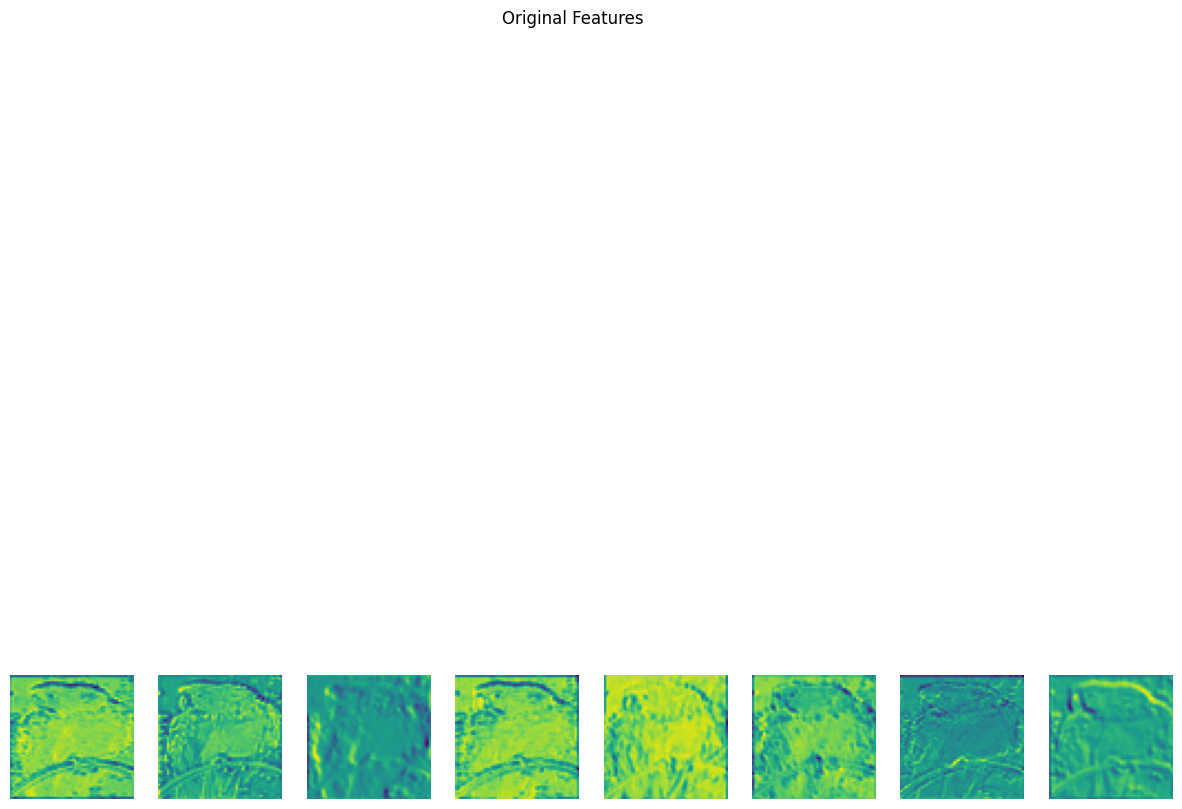

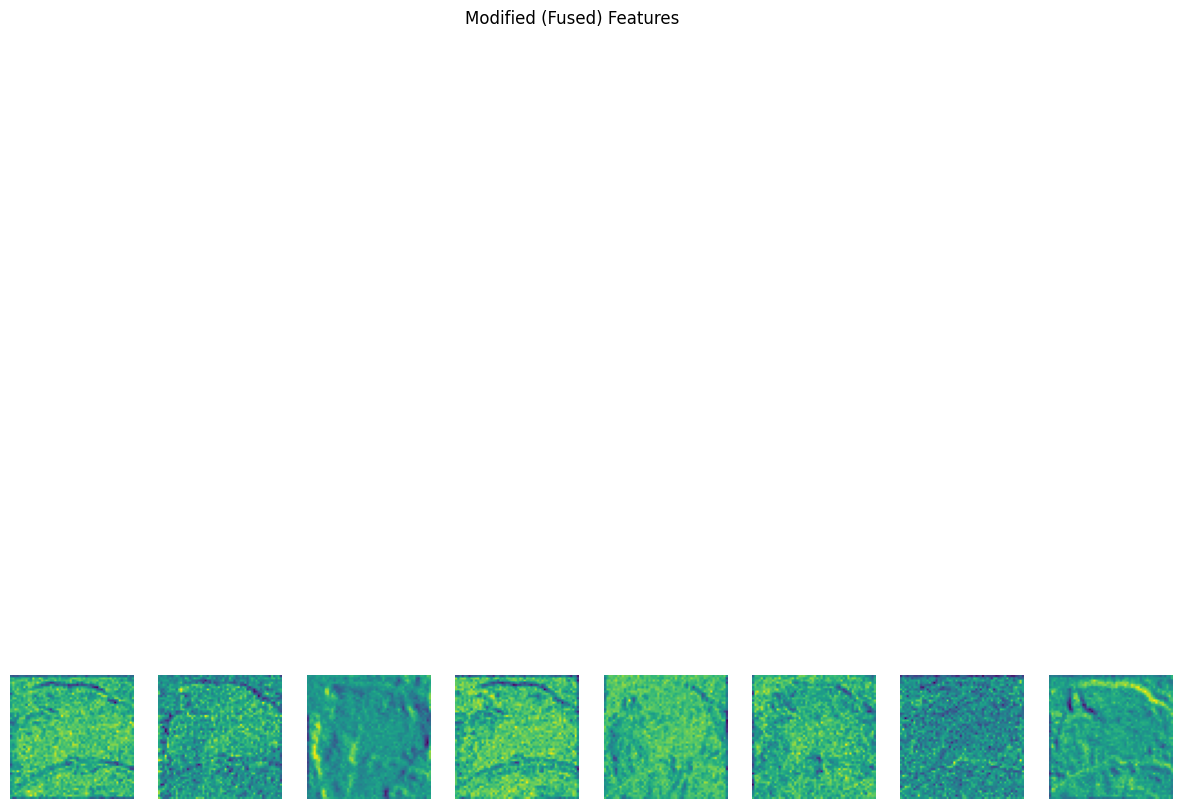

In [5]:
import torch
import torch.nn as nn
import torchvision.models as models
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt


model = models.resnet18(pretrained=True)
model.eval()


original_features = []
modified_features = []


def forward_hook(module, input, output):
    original_features.append(output.detach().cpu())  
    modified_output = output + torch.randn_like(output) * 0.5
    modified_features.append(modified_output.detach().cpu()) 
    return modified_output


hook = model.layer1[0].conv1.register_forward_hook(forward_hook)


image_path = "/Users/keyi/Downloads/RGB_24bits_palette_sample_image.jpg"  
image = Image.open(image_path).convert("RGB")
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
input_tensor = transform(image).unsqueeze(0)  


output = model(input_tensor)


hook.remove()

def visualize_features(features, title, num_channels=8):
    features = features.squeeze(0)  
    fig, axes = plt.subplots(1, num_channels, figsize=(15, 15))
    for i in range(num_channels):
        ax = axes[i]
        ax.imshow(features[i].detach().numpy(), cmap="viridis")
        ax.axis("off")
    plt.suptitle(title)
    plt.show()


visualize_features(original_features[0], "Original Features")


visualize_features(modified_features[0], "Modified (Fused) Features")